# ABEL scanning example

By Carl A. Lindstrøm (University of Oslo), 8 Sep 2023

### Import ABEL framework

In [1]:
from abel import *
import copy

### Define the linac and beams

In [2]:
# define driver
driver_source = SourceBasic()
driver_source.charge = -2.7e10 * SI.e # [C]
driver_source.energy = 31.25e9 # [eV]
driver_source.rel_energy_spread = 0.01
driver_source.bunch_length = 42e-6 # [m]
driver_source.z_offset = 300e-6 # [m]
driver_source.emit_nx, driver_source.emit_ny = 10e-6, 10e-6 # [m rad]
driver_source.beta_x, driver_source.beta_y = 30e-3, 30e-3 # [m]
driver_source.num_particles = 10000
driver_source.jitter.x = 0e-9 # [m]
driver_source.jitter.y = 0e-9 # [m]

# define stage
stage = StageQuasistatic2d()
stage.driver_source = driver_source
stage.nom_energy_gain = 31.9e9 # [eV]
stage.length_flattop = 5 # [m]
stage.plasma_density = 7e21 # [m^-3]
stage.ramp_beta_mag = 2.0
stage.upramp = PlasmaRamp()
stage.downramp = PlasmaRamp()

# define first stage (half length)
first_stage = copy.deepcopy(stage)
first_stage.nom_energy_gain = stage.nom_energy_gain/2
first_stage.length_flattop = stage.length_flattop/2

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = 5e9 # [eV]
source.rel_energy_spread = 0.1
source.bunch_length = 18e-6 # [m]
source.z_offset = -34e-6 # [m]
source.emit_nx, source.emit_ny = 160e-6, 0.56e-6 # [m rad]
source.beta_x = stage.matched_beta_function(source.energy)
source.beta_y = source.beta_x
source.num_particles = 5000

# define interstage
interstage = InterstagePlasmaLensBasic()
interstage.beta0 = lambda E: stage.matched_beta_function(E)
interstage.R56 = lambda E: -0.25e-3/np.sqrt(E/10e9)
interstage.length_dipole = lambda E: 1 * np.sqrt(E/10e9) # [m(eV)]
interstage.field_dipole = 0.5 # [T]

# beam delivery system
bds = BeamDeliverySystemBasic()
bds.beta_x, bds.beta_y = 8e-3, 0.4e-3 # [m]
bds.bunch_length = 0.75 * bds.beta_y

# define linac
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.first_stage = first_stage
linac.interstage = interstage
linac.num_stages = 5

### Run simulation scan

In [3]:
# scan the driver timing jitter
linac.scan('scan_energy_spread_RR_{stage.', 
           lambda obj, val: setattr(obj.stage.driver_source.jitter, 't', val) or obj, 
           np.logspace(-15.8, -13.8, 8),
           label='Driver timing jitter (fs rms)',
           scale=1e-15,
           num_shots_per_step=4, 
           parallel=True,
           overwrite=False);

Output()

>> SHOT 1 already exists and will not be overwritten.
>> SHOT 2 already exists and will not be overwritten.
>> SHOT 3 already exists and will not be overwritten.
>> SHOT 4 already exists and will not be overwritten.
>> SHOT 17 already exists and will not be overwritten.
>> SHOT 18 already exists and will not be overwritten.
>> SHOT 19 already exists and will not be overwritten.
>> SHOT 20 already exists and will not be overwritten.
>> SHOT 21 already exists and will not be overwritten.
>> SHOT 22 already exists and will not be overwritten.
>> SHOT 23 already exists and will not be overwritten.
>> SHOT 25 already exists and will not be overwritten.
>> SHOT 6 already exists and will not be overwritten.
>> SHOT 26 already exists and will not be overwritten.
>> SHOT 24 already exists and will not be overwritten.
>> SHOT 27 already exists and will not be overwritten.
>> SHOT 28 already exists and will not be overwritten.
>> SHOT 7 already exists and will not be overwritten.
>> SHOT 29 alrea

### Plot beam evolution

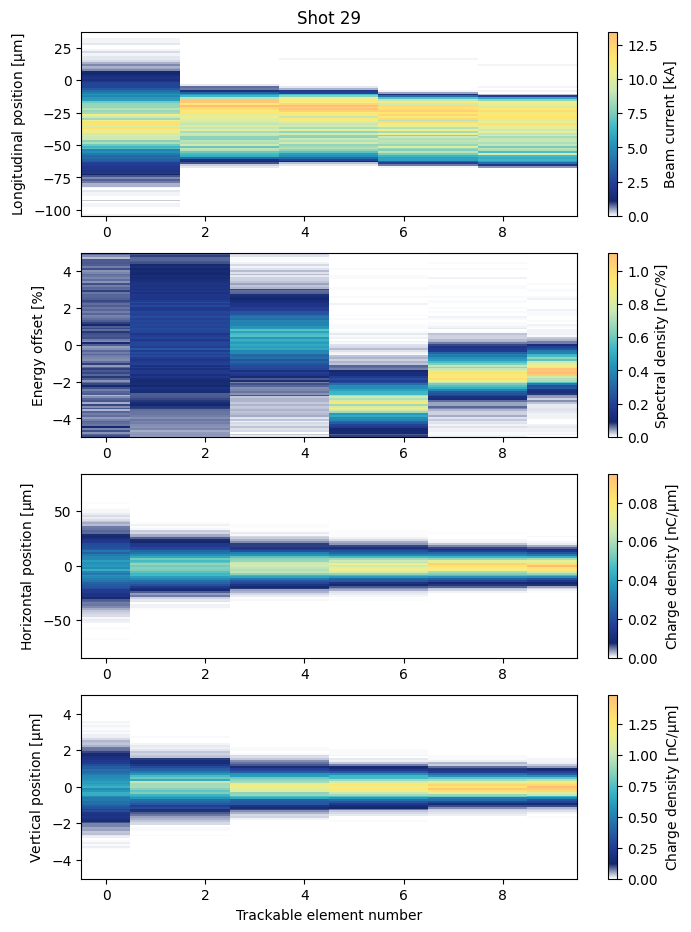

In [4]:
# evolution at the last step (highest jitter)
linac[-1,0].plot_waterfalls()

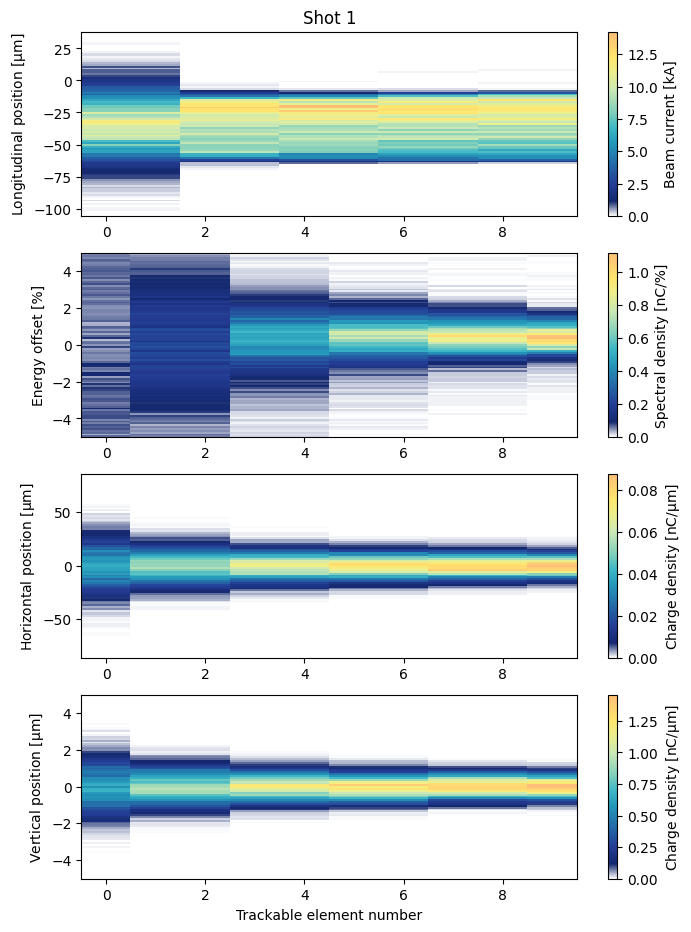

In [5]:
# evolution at the first step (lowest jitter)
linac[0,0].plot_waterfalls()

### Plot beam parameter variation over the scan

/Users/carlal/UiO/Code/software/ABEL/abel/classes/runnable.py:495: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


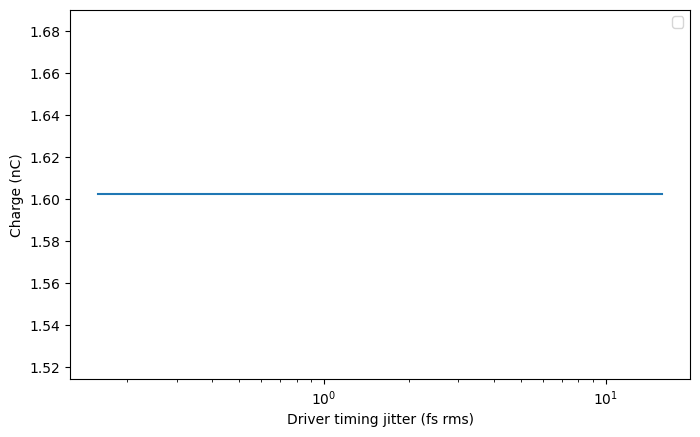

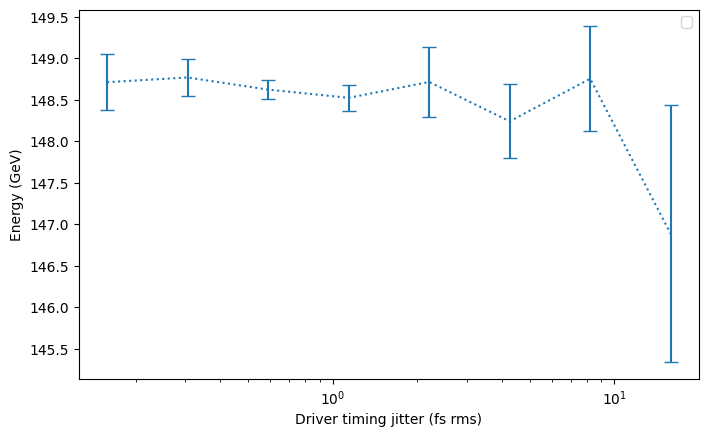

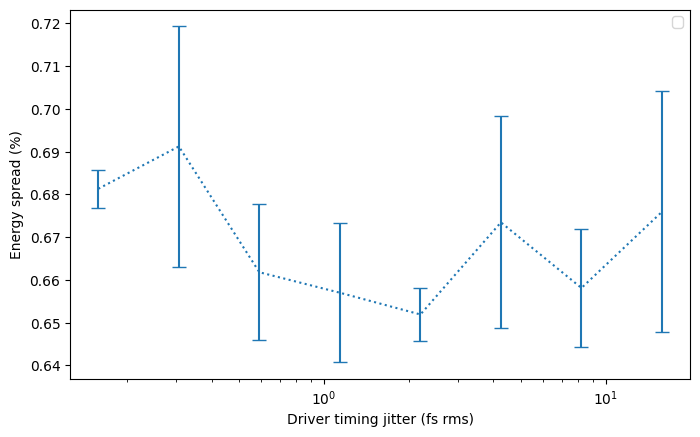

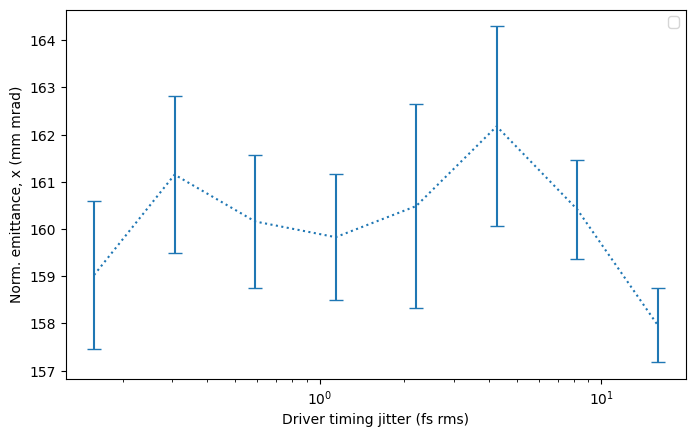

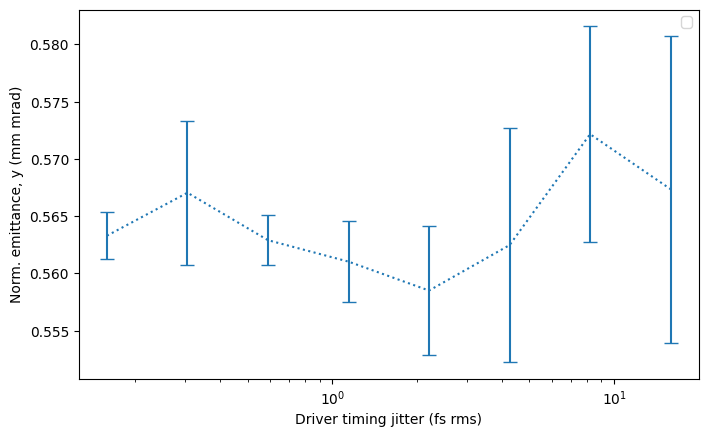

In [6]:
# plot energy spread vs bunch length
linac.plot_beam_function(Beam.charge, label='Charge (nC)', scale=-1e-9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.energy, label='Energy (GeV)', scale=1e9, xscale='log', yscale='linear')
linac.plot_beam_function(Beam.rel_energy_spread, label='Energy spread (%)', scale=1e-2, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_x, label='Norm. emittance, x (mm mrad)', scale=1e-6, xscale='log')
linac.plot_beam_function(Beam.norm_emittance_y, label='Norm. emittance, y (mm mrad)', scale=1e-6, xscale='log')